<a href="https://colab.research.google.com/github/mesaayu/Skripsi_PrediksiCurahHujan/blob/main/fix_codeskripsi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Library**

In [ ]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from google.colab import drive

In [ ]:
#menghubungkan ke drive
drive.mount('/content/drive/')

Mounted at /content/drive/


**Data Pre-processing**

Menampilkan Dataset

In [ ]:
path = '/content/drive/MyDrive/scprediksi/raw_data.csv'

#menampilkan data mentah gabungan
df = pd.read_csv(path)
print(df.head())

      Tanggal    Tn    Tx  Tavg  RH_avg   RR    ss  ff_x  ddd_x  ff_avg
0  01-01-2019  22.5  30.4  25.0    89.0  9.3   1.9  10.0  286.0     2.0
1  02-01-2019  23.4  32.1  26.0    84.0  1.6   1.8   5.0  260.0     1.0
2  03-01-2019  22.9  32.2  26.8    76.0    2   6.8   3.0  240.0     1.0
3  04-01-2019  21.3  32.8  26.6    77.0  NaN   5.6   4.0  320.0     1.0
4  05-01-2019  22.0  33.2  26.7    76.0  NaN  11.2   7.0  360.0     1.0


Penyesuaian format data

In [ ]:
#mengubah nama atribut
df.rename(columns={
    'Tn': 'suhu_min',
    'Tx': 'suhu_max',
    'Tavg': 'suhu_avg',
    'RH_avg': 'kelembapan_avg',
    'RR': 'curah_hujan',
    'ss': 'sinar_mthr',
    'ff_x': 'angin_max',
    'ddd_x': 'arah_angin',
    'ff_avg': 'angin_avg'
}, inplace=True)

In [ ]:
#mengecek tipe data atribut
df.dtypes

,0
Tanggal,object
suhu_min,float64
suhu_max,float64
suhu_avg,float64
kelembapan_avg,float64
curah_hujan,object
sinar_mthr,float64
angin_max,float64
arah_angin,float64
angin_avg,float64


In [ ]:
#melihat nilai unik pada kolom curah hujan
print(df['curah_hujan'].unique())

['9.3' '1.6' '2' nan '13.3' '4.8' '23.1' '1.9' '12.4' '34.4' '8888' '0.7'
 '9.5' '4.2' '24.6' '32.4' '39.8' '5.7' '18.1' '20.8' '17.5' '9.1' '0.3'
 '20.5' '3.1' '8.2' '5.2' '6.4' '5.3' '4.1' '3.2' '55.5' '5' '6.9' '0.1'
 '2.4' '39.2' '15.4' '68.3' '3.5' '41.3' '17' '4.9' '38.5' '21.7' '17.8'
 '2.9' '0.5' '7.4' '10.2' '1.4' '1.5' '1.1' '1.7' '16.5' '4.5' '29.4'
 '111' '12.8' '1.3' '8.4' '46.3' '36.8' '2.8' '12.9' '17.4' '3.4' '5.4'
 '134.2' '99' '115.9' '1' '46.7' '8.8' '56.6' '10.8' '13.6' '0.6' '78.7'
 '1.2' '10' '67.9' '0' '58' '18.2' '34.8' '17.1' '11.2' '3' '14.8' '33.6'
 '35.4' '29.6' '52.3' '18.9' '13.5' '1.8' '54.2' '28' '21.2' '5.1' '13.9'
 '78.6' '18.6' '44' '130.1' '3.3' '8' '72' '7.8' '16.3' '28.5' '6.6'
 '45.7' '57.5' '61.7' '5.8' '2.1' '43.4' '83.6' '17.3' '63.4' '34.3' '141'
 '30.3' '19.5' '22.6' '20.3' '10.5' '21.3' '4' '20.6' '44.4' '6.2' '2.5'
 '4.6' '9' '83' '0.2' '99.9' '10.9' '8.5' '9.6' '43.7' '9.2' '26.6' '32.6'
 '116.7' '0.9' '0.4' '40.3' '56.8' '7' '52.8' '19.2'

In [ ]:
# Mengecek jumlah '-' pada kolom curah_hujan
count = (df['curah_hujan'] == '-').sum()
print(f"Nilai '-' ditemukan sebanyak {count} kali di kolom 'curah_hujan'")

Nilai '-' ditemukan sebanyak 4 kali di kolom 'curah_hujan'


In [ ]:
# menghapus karakter non numerik
df['curah_hujan'] = df['curah_hujan'].replace('-', np.nan)
df['curah_hujan'] = pd.to_numeric(df['curah_hujan'], errors='coerce')

In [ ]:
#mengecek ulang tipe data atribut
df.dtypes

,0
Tanggal,object
suhu_min,float64
suhu_max,float64
suhu_avg,float64
kelembapan_avg,float64
curah_hujan,float64
sinar_mthr,float64
angin_max,float64
arah_angin,float64
angin_avg,float64


Pembersihan ketidaksesuaian nilai

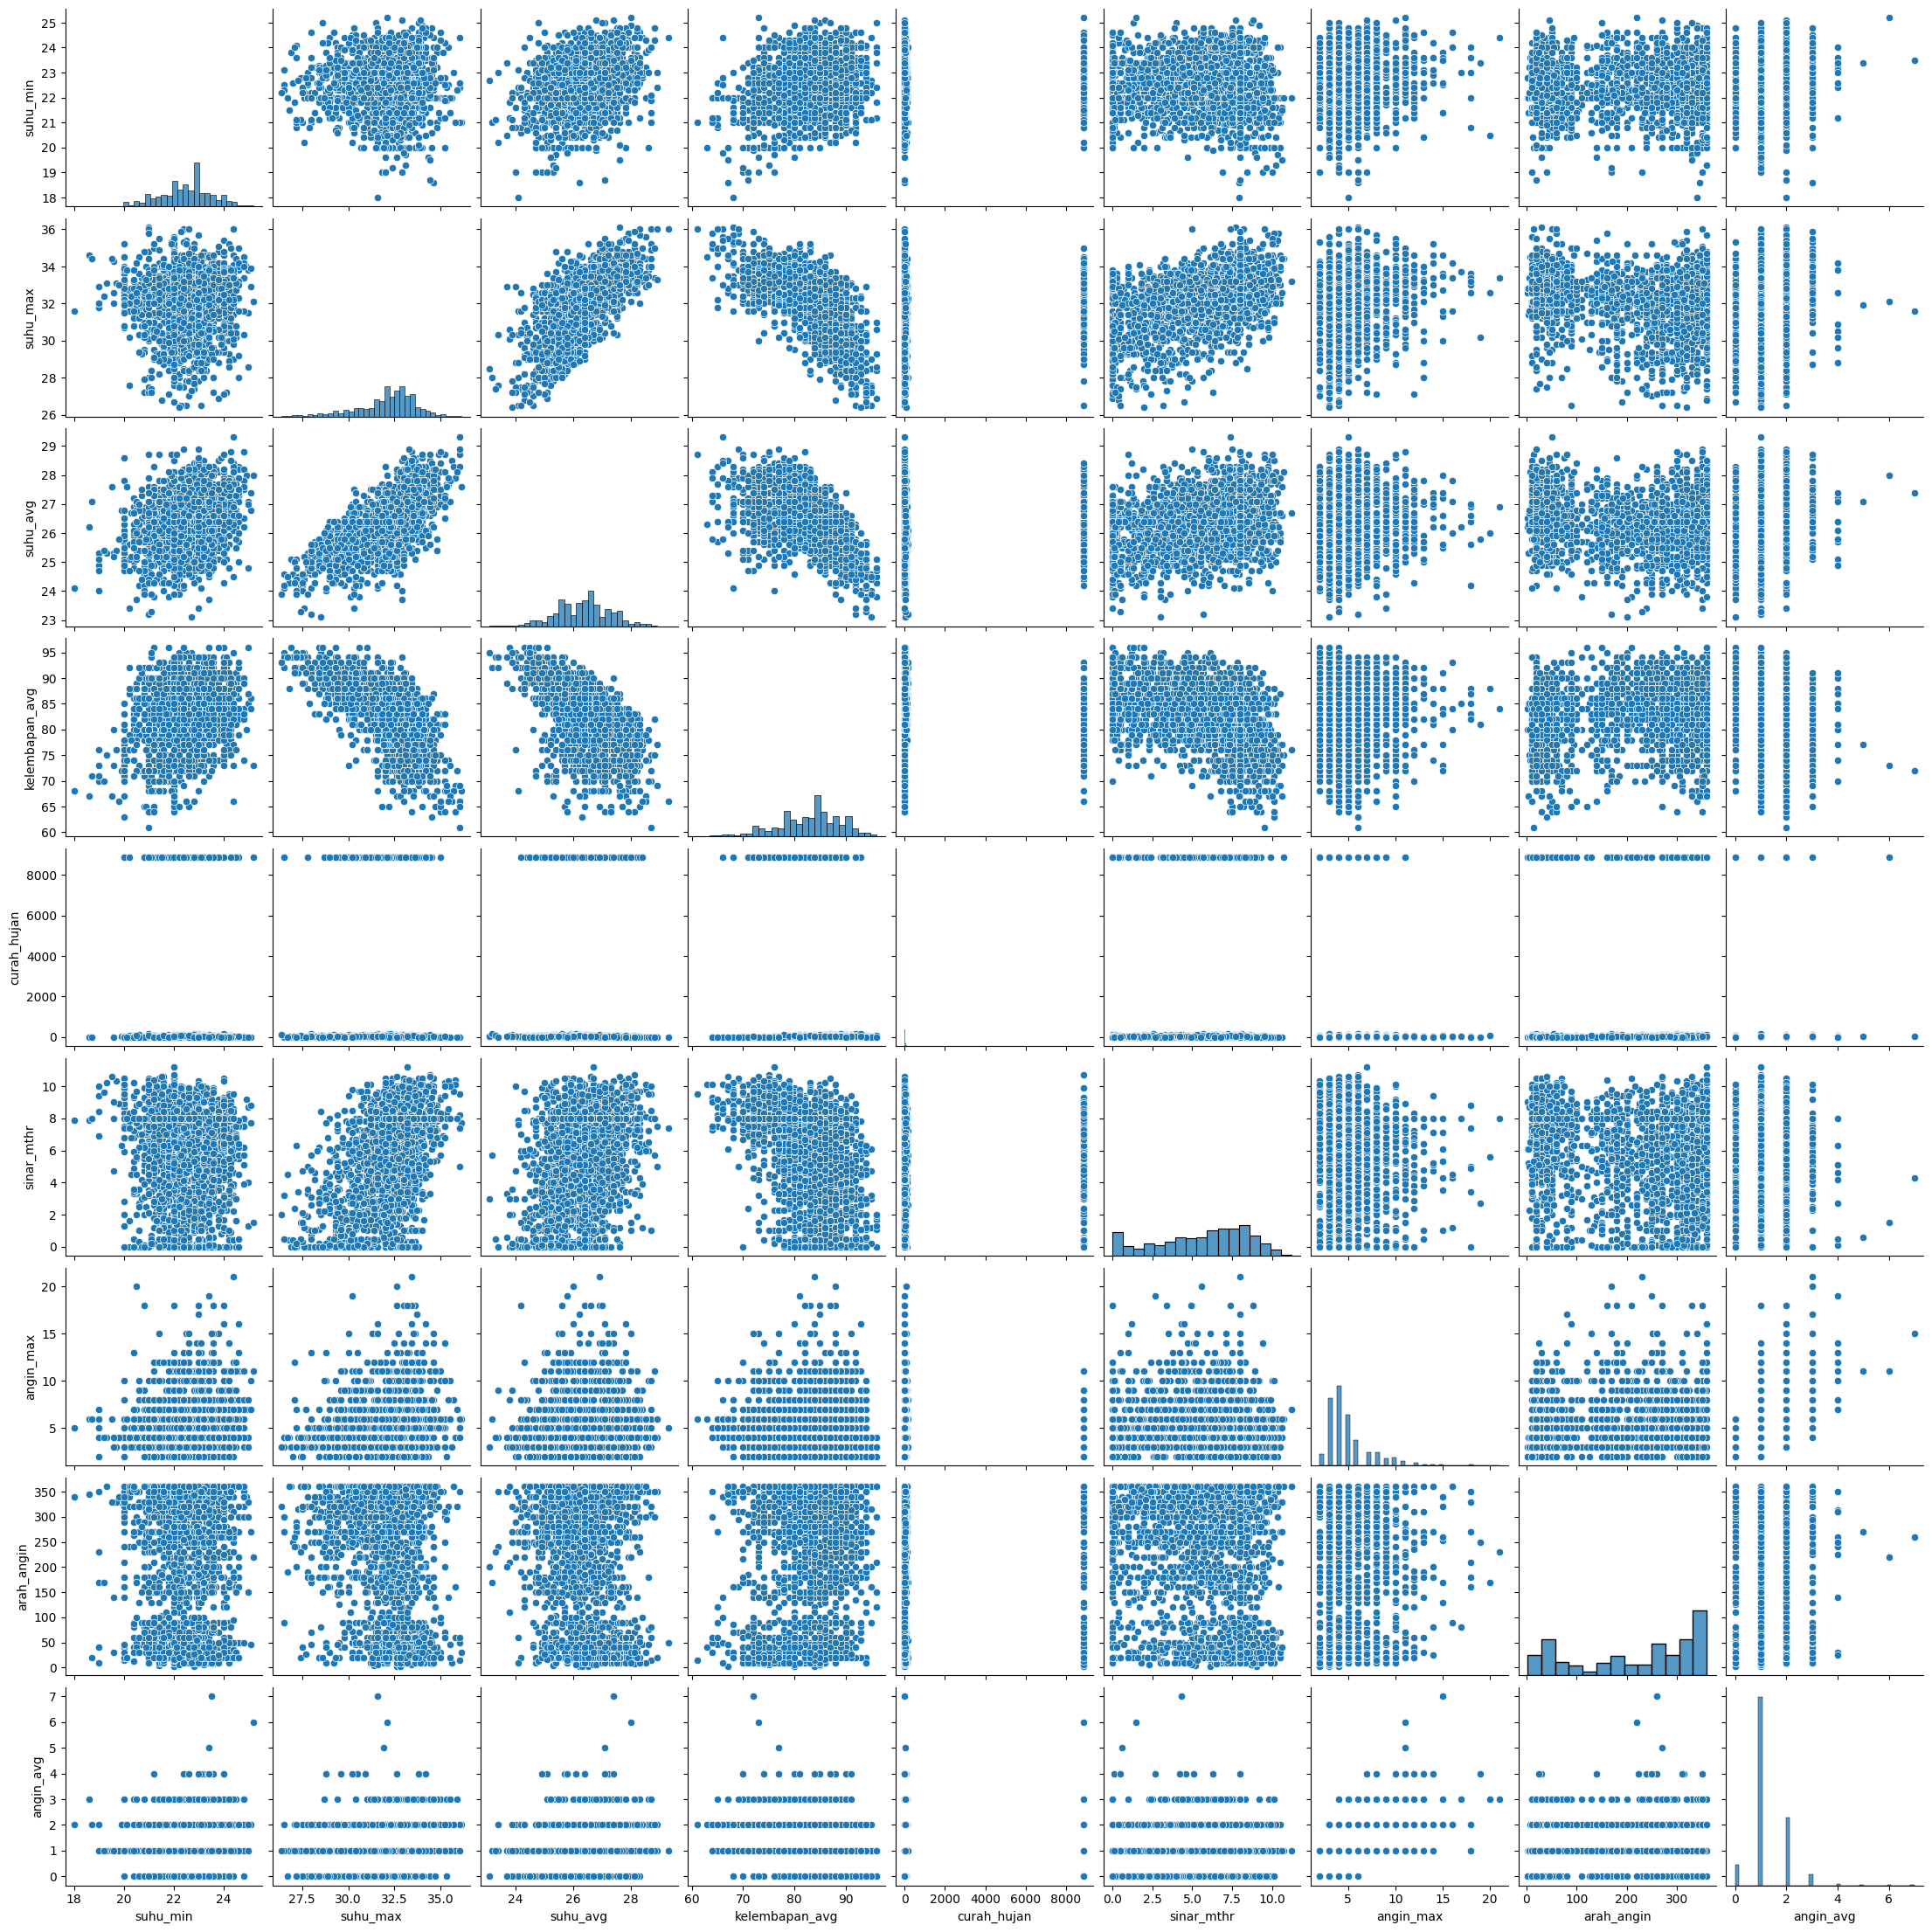

In [ ]:
#melihat persebaran data
selected_features = [
    'suhu_min', 'suhu_max', 'suhu_avg', 'kelembapan_avg',
    'curah_hujan', 'sinar_mthr', 'angin_max', 'arah_angin', 'angin_avg'
]

# Buat pairplot
sns.pairplot(df[selected_features])
plt.show()

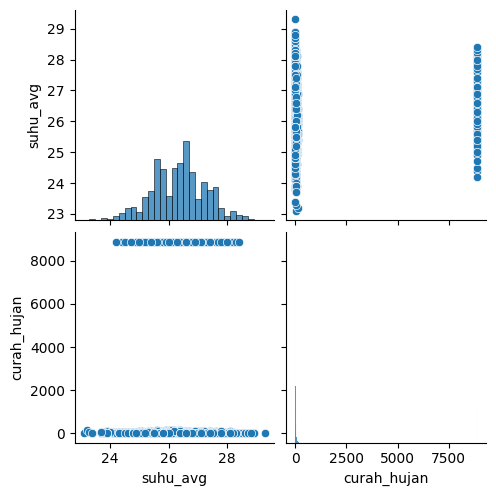

In [ ]:
#persebaran data curah hujan dan suhu avg
sns.pairplot(df[['suhu_avg', 'curah_hujan']])
plt.show()

In [ ]:
# Mengecek jumlah nilai 8888 pada kolom curah_hujan
count = (df['curah_hujan'] == 8888).sum()
print(f"Nilai '8888' ditemukan sebanyak {count} kali di kolom 'curah_hujan'")

Nilai '8888' ditemukan sebanyak 125 kali di kolom 'curah_hujan'


In [ ]:
#membersihkan nilai tidak valid
df['curah_hujan'] = df['curah_hujan'].replace([8888], np.nan)

#mengecek apakah masih ada nilai 8888
print(df['curah_hujan'].isin([8888]).any())

False


In [ ]:
#mengecek statistik data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
suhu_min,1999.0,22.471636,1.053727,18.0,21.8,22.50,23.200,25.2
suhu_max,2111.0,32.100379,1.552543,26.4,31.4,32.40,33.200,36.1
suhu_avg,2147.0,26.338845,0.918922,23.1,25.7,26.40,27.000,29.3
kelembapan_avg,2145.0,82.884848,5.925161,61.0,79.0,84.00,87.000,96.0
curah_hujan,1482.0,15.986100,23.117266,0.0,1.0,6.35,22.225,155.2
sinar_mthr,2135.0,5.593817,2.832860,0.0,3.6,6.20,7.900,11.2
angin_max,2186.0,5.020128,2.499896,2.0,3.0,4.00,6.000,21.0
arah_angin,2185.0,217.477803,122.172413,2.0,90.0,260.00,330.000,360.0
angin_avg,2186.0,1.261208,0.687865,0.0,1.0,1.00,2.000,7.0


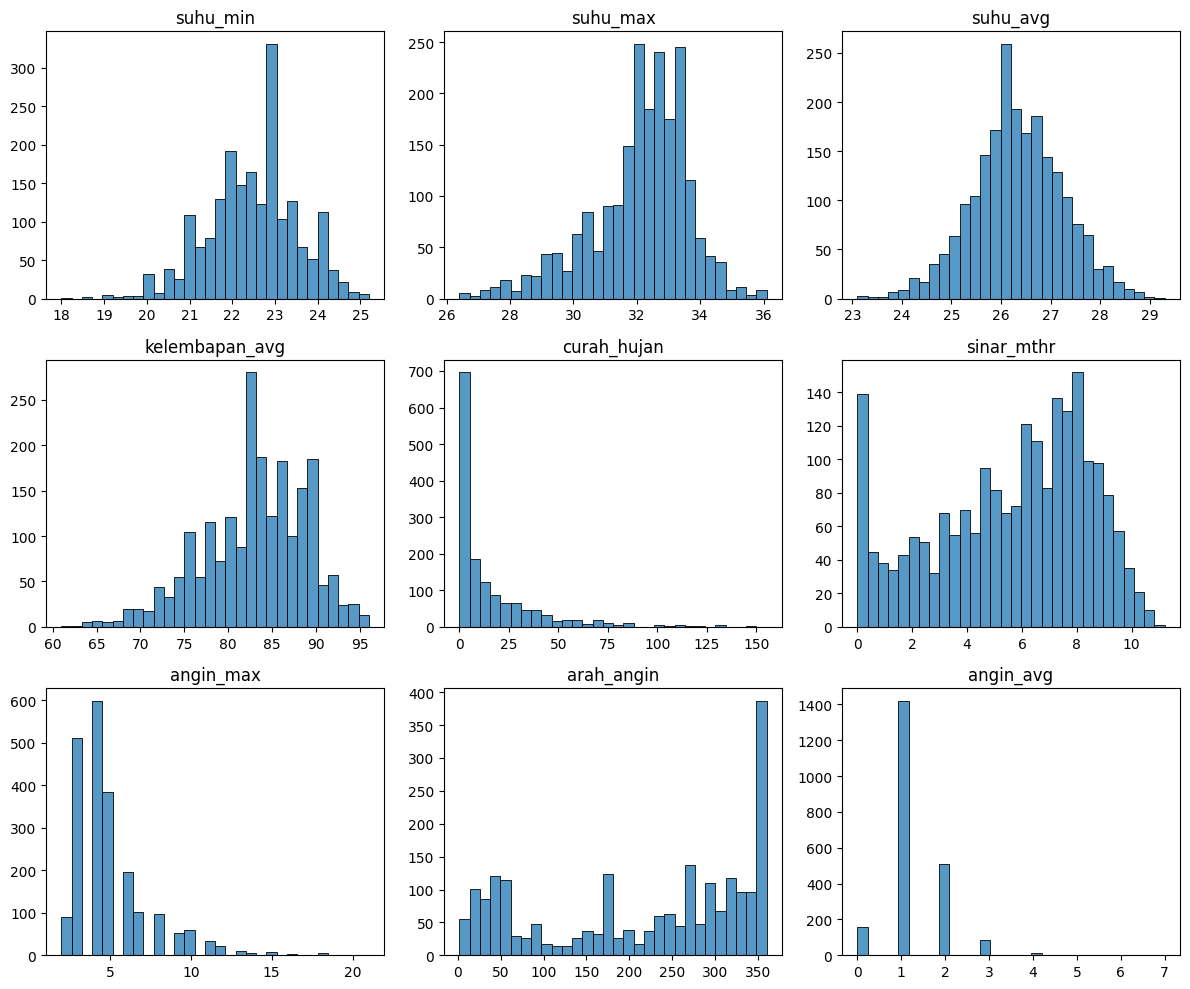

In [ ]:
#menampilkan distribusi data
features = [
    'suhu_min', 'suhu_max', 'suhu_avg', 'kelembapan_avg',
    'curah_hujan', 'sinar_mthr', 'angin_max', 'arah_angin', 'angin_avg'
]

plt.figure(figsize=(12, 10))
for i, col in enumerate(features):
    plt.subplot(3, 3, i + 1)  # subplot grid 3x3
    sns.histplot(df[col], bins=30)
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

Identifikasi Duplikat

In [ ]:
#mengecek duplikat
total_duplikat = df.duplicated().sum()
print(f"Jumlah duplikat pada data: {total_duplikat}")

Jumlah duplikat pada data: 0


Pengecekan dan Penanganan Missing Value

In [ ]:
#mengecek missing value
df.isna().sum()

,0
Tanggal,0
suhu_min,193
suhu_max,81
suhu_avg,45
kelembapan_avg,47
curah_hujan,710
sinar_mthr,57
angin_max,6
arah_angin,7
angin_avg,6


In [ ]:
#menghapus nilai kosong pada atribut curah hujan
df = df.dropna(subset=['curah_hujan'])

df.isna().sum()

,0
Tanggal,0
suhu_min,119
suhu_max,57
suhu_avg,25
kelembapan_avg,27
curah_hujan,0
sinar_mthr,32
angin_max,0
arah_angin,1
angin_avg,0


In [ ]:
#mengisi nilai hilang dengan rata-rata setiap kolom
df= df.fillna(df.mean(numeric_only=True).round(1))

df.isna().sum()

,0
Tanggal,0
suhu_min,0
suhu_max,0
suhu_avg,0
kelembapan_avg,0
curah_hujan,0
sinar_mthr,0
angin_max,0
arah_angin,0
angin_avg,0


In [ ]:
df.count()

,0
Tanggal,1482
suhu_min,1482
suhu_max,1482
suhu_avg,1482
kelembapan_avg,1482
curah_hujan,1482
sinar_mthr,1482
angin_max,1482
arah_angin,1482
angin_avg,1482


Seleksi Fitur

In [ ]:
# mengecualikan kolom tanggal
numerical_df = df.select_dtypes(include=['number'])

#menghitung korelasi terhadao target
correlation = numerical_df.corr()['curah_hujan'].sort_values(ascending=False)
print(correlation)

curah_hujan       1.000000
kelembapan_avg    0.250481
angin_max         0.039211
sinar_mthr        0.016823
arah_angin        0.016023
suhu_min         -0.003715
suhu_max         -0.033312
angin_avg        -0.038898
suhu_avg         -0.117251
Name: curah_hujan, dtype: float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1482 entries, 0 to 2191
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tanggal         1482 non-null   object 
 1   suhu_min        1482 non-null   float64
 2   suhu_max        1482 non-null   float64
 3   suhu_avg        1482 non-null   float64
 4   kelembapan_avg  1482 non-null   float64
 5   curah_hujan     1482 non-null   float64
 6   sinar_mthr      1482 non-null   float64
 7   angin_max       1482 non-null   float64
 8   arah_angin      1482 non-null   float64
 9   angin_avg       1482 non-null   float64
dtypes: float64(9), object(1)
memory usage: 127.4+ KB


**Transformation**

Pengecekan Outlier

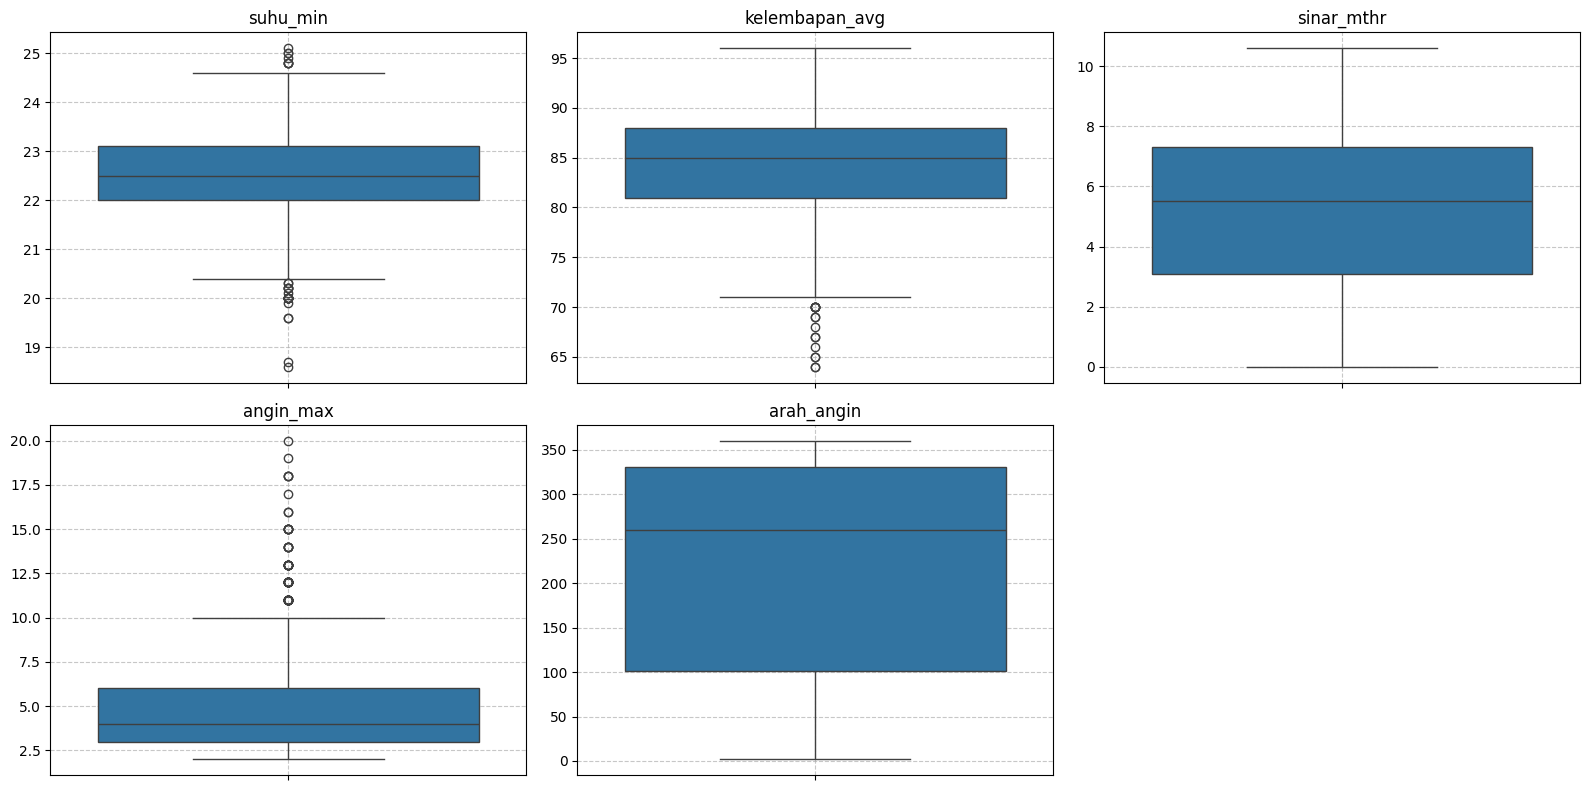

In [ ]:
# mengecek outlier dengan boxplot
fitur = [
    'suhu_min', 'kelembapan_avg', 'sinar_mthr',
    'angin_max', 'arah_angin'
]

plt.figure(figsize=(16, 8))
for i, kolom in enumerate(fitur, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[kolom])
    plt.title(f'{kolom}')
    plt.ylabel('')
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Penerapan Quantile Transform

In [ ]:
#Inisialisasi Quantile Transformer
qt = QuantileTransformer(output_distribution='normal', random_state=42)

#daftar fitur yang akan ditransformasi
fitur_outlier = ['suhu_min', 'kelembapan_avg', 'angin_max']

#Transformasi fitur yang memiliki outlier
df[[f + '_qt' for f in fitur_outlier]] = qt.fit_transform(df[fitur_outlier])

print(df[['suhu_min', 'suhu_min_qt', 'kelembapan_avg', 'kelembapan_avg_qt',
          'angin_max', 'angin_max_qt']].head())

   suhu_min  suhu_min_qt  kelembapan_avg  kelembapan_avg_qt  angin_max  \
0      22.5    -0.016310            89.0           0.895780       10.0   
1      23.4     0.941700            84.0          -0.186756        5.0   
2      22.9     0.414267            76.0          -1.453280        3.0   
7      22.5    -0.016310            84.0          -0.186756        2.0   
8      23.1     0.686350            86.0           0.253606        4.0   

   angin_max_qt  
0      1.486537  
1      0.292676  
2     -1.027247  
7     -5.199338  
8     -0.261387  


Pengecekan fitur outlier setelah diterapkan Quantile Transform

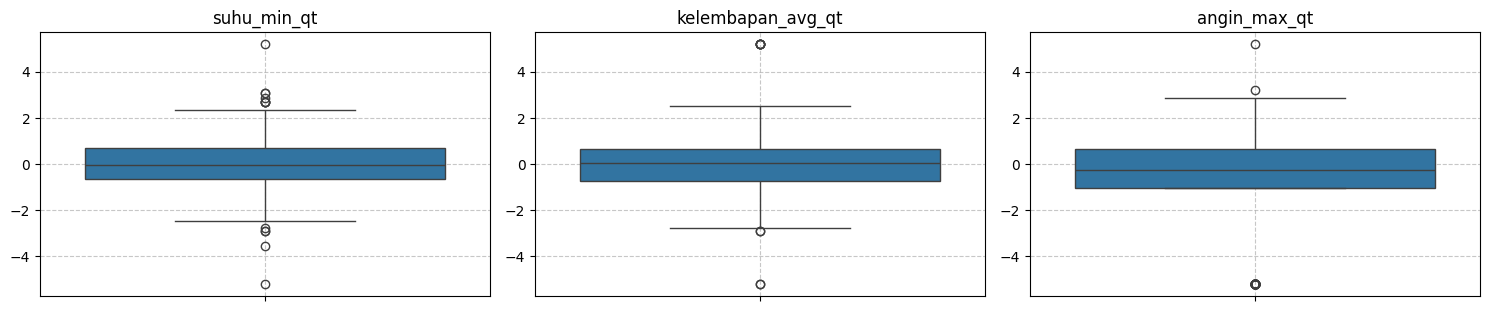

In [ ]:
# Daftar fitur yang  diterapkan Quantile Transform
fitur_qt = [
    'suhu_min_qt', 'kelembapan_avg_qt', 'angin_max_qt'
]

plt.figure(figsize=(15, 6))
for i, kolom in enumerate(fitur_qt, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[kolom])
    plt.title(f'{kolom}')
    plt.ylabel('')
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Data Mining**

In [ ]:
#variabel predictors dan target
predictors = ['suhu_min_qt', 'kelembapan_avg_qt', 'sinar_mthr', 'angin_max_qt', 'arah_angin']
target = 'curah_hujan'

In [ ]:
X = df[predictors]
y = df[target]

Model default Random Forest

In [ ]:
#model default rf
rf_default = RandomForestRegressor(random_state=42)

In [ ]:
#evaluasi model default dengan k-fold

#nilai k
k_values = [3, 5, 7, 10, 15]

for k in k_values:
    print(f"\n=== Hasil K = {k} ===")

    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    rmse_scores = []
    mae_scores = []

    #melatih model default Random Forest pada data latih fold saat ini
    for train_index, test_index in kf.split(X):
        X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
        y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

        #prediksi target pada data uji fold saat ini
        rf_default.fit(X_train_cv, y_train_cv)
        y_pred = rf_default.predict(X_test_cv)

        #menghitung nilai rmse dan mae
        rmse_scores.append(np.sqrt(mean_squared_error(y_test_cv, y_pred)))
        mae_scores.append(mean_absolute_error(y_test_cv, y_pred))

    print(f"Rata-rata RMSE : {np.mean(rmse_scores):.4f}")
    print(f"Rata-rata MAE  : {np.mean(mae_scores):.4f}")


=== Hasil K = 3 ===
Rata-rata RMSE : 23.4740
Rata-rata MAE  : 16.2306

=== Hasil K = 5 ===
Rata-rata RMSE : 23.5555
Rata-rata MAE  : 16.2928

=== Hasil K = 7 ===
Rata-rata RMSE : 23.5205
Rata-rata MAE  : 16.3676

=== Hasil K = 10 ===
Rata-rata RMSE : 23.5165
Rata-rata MAE  : 16.4000

=== Hasil K = 15 ===
Rata-rata RMSE : 23.2631
Rata-rata MAE  : 16.1949


Hyperparameter Tuning dengan Grid Search

In [ ]:
#model rf
rf = RandomForestRegressor(random_state=42)

#menentukan hyperparameter
param_grid = {
    'bootstrap': [True],
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15],
    'max_features': [3, 'sqrt', 'log2']
}

#GridSearchCV dengan 10-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=10, n_jobs=-1, verbose=2, scoring='neg_root_mean_squared_error')

In [ ]:
#melatih dan mencari hyperparameter optimal pada data
grid_search.fit(X, y)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [None, 5, 10, 15],
                         'max_features': [3, 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [ ]:
#model dengan hyperparameter GridSearch
best_model = grid_search.best_estimator_

**Evaluation**

In [ ]:
#evaluasi model terbaik dengan k-fold
k_values = [3, 5, 7, 10, 15]


for k in k_values:
    print(f"\n=== Evaluasi akhir (best_model) dengan K = {k} ===")

    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    rmse_scores = []
    mae_scores = []

    for train_index, test_index in kf.split(X):
        X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
        y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

        best_model.fit(X_train_cv, y_train_cv)
        y_pred = best_model.predict(X_test_cv)

        rmse = np.sqrt(mean_squared_error(y_test_cv, y_pred))
        mae = mean_absolute_error(y_test_cv, y_pred)

        rmse_scores.append(rmse)
        mae_scores.append(mae)

    print(f"Rata-rata RMSE : {np.mean(rmse_scores):.4f}")
    print(f"Rata-rata MAE  : {np.mean(mae_scores):.4f}")


=== Evaluasi akhir (best_model) dengan K = 3 ===
Rata-rata RMSE : 22.1522
Rata-rata MAE  : 15.2439

=== Evaluasi akhir (best_model) dengan K = 5 ===
Rata-rata RMSE : 22.0953
Rata-rata MAE  : 15.2455

=== Evaluasi akhir (best_model) dengan K = 7 ===
Rata-rata RMSE : 22.0811
Rata-rata MAE  : 15.2487

=== Evaluasi akhir (best_model) dengan K = 10 ===
Rata-rata RMSE : 21.9812
Rata-rata MAE  : 15.2155

=== Evaluasi akhir (best_model) dengan K = 15 ===
Rata-rata RMSE : 21.9267
Rata-rata MAE  : 15.2142


In [ ]:
#nilai k terbaik
k = 15
kf = KFold(n_splits=k, shuffle=True, random_state=42)

all_predictions = pd.Series(index=y.index, dtype=float)

for train_index, test_index in kf.split(X):
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

    best_model.fit(X_train_cv, y_train_cv)
    y_pred = best_model.predict(X_test_cv)

    # Simpan prediksi ke posisi indeks asli
    all_predictions.iloc[test_index] = y_pred

Perbandingan Data Aktual dan Data Prediksi

In [ ]:
#menampilkan nilai aktual dan prediksi
tanggal = df.loc[y.index, 'Tanggal']

hasil_prediksi = pd.DataFrame({
    'Tanggal': tanggal.values,
    'Aktual': y.values,
    'Prediksi': np.round(all_predictions.values, 1)
})

# mengurutkan tanggal
hasil_prediksi['Tanggal'] = pd.to_datetime(hasil_prediksi['Tanggal'], format='%d-%m-%Y')
hasil_prediksi = hasil_prediksi.sort_values(by='Tanggal')

In [ ]:
print(hasil_prediksi.head(20))

      Tanggal  Aktual  Prediksi
0  2019-01-01     9.3      19.3
1  2019-01-02     1.6      10.9
2  2019-01-03     2.0       7.4
3  2019-01-08    13.3      13.1
4  2019-01-09     4.8      21.6
5  2019-01-10    23.1      17.4
6  2019-01-12     1.9      26.4
7  2019-01-13    12.4      17.9
8  2019-01-14    34.4      18.1
9  2019-01-17     0.7      11.9
10 2019-01-18     9.5      10.8
11 2019-01-20     4.2      16.8
12 2019-01-21     9.3      21.4
13 2019-01-23    24.6      10.8
14 2019-01-24    32.4      13.2
15 2019-01-25    39.8      18.0
16 2019-01-26     5.7      13.3
17 2019-01-27     0.7      18.0
18 2019-01-28    18.1      15.4
19 2019-01-29     1.9      13.6


In [ ]:
hasil_prediksi_des = hasil_prediksi[
    (hasil_prediksi['Tanggal'].dt.month == 12) &
    (hasil_prediksi['Tanggal'].dt.year == 2021)
]

print(hasil_prediksi_des.head(30))

       Tanggal  Aktual  Prediksi
656 2021-12-05     3.5      14.3
657 2021-12-06     3.8      13.5
658 2021-12-07    24.9      18.7
659 2021-12-08    14.5      13.5
660 2021-12-09     4.0      22.8
661 2021-12-10     2.5      12.3
662 2021-12-11    28.7      27.0
663 2021-12-12     7.5      20.0
664 2021-12-13    23.5      11.2
665 2021-12-16    29.9      13.6
666 2021-12-17     9.4      16.6
667 2021-12-18     7.1      13.1
668 2021-12-19     0.5      10.2
669 2021-12-20     2.0      23.1
670 2021-12-21    15.1      20.6
671 2021-12-22     6.8      10.3
672 2021-12-24     0.8      17.6
673 2021-12-25    39.6      12.6
674 2021-12-26    21.3      23.5
675 2021-12-28    18.7      26.5
676 2021-12-29     1.5      11.3
677 2021-12-31    13.5       8.3


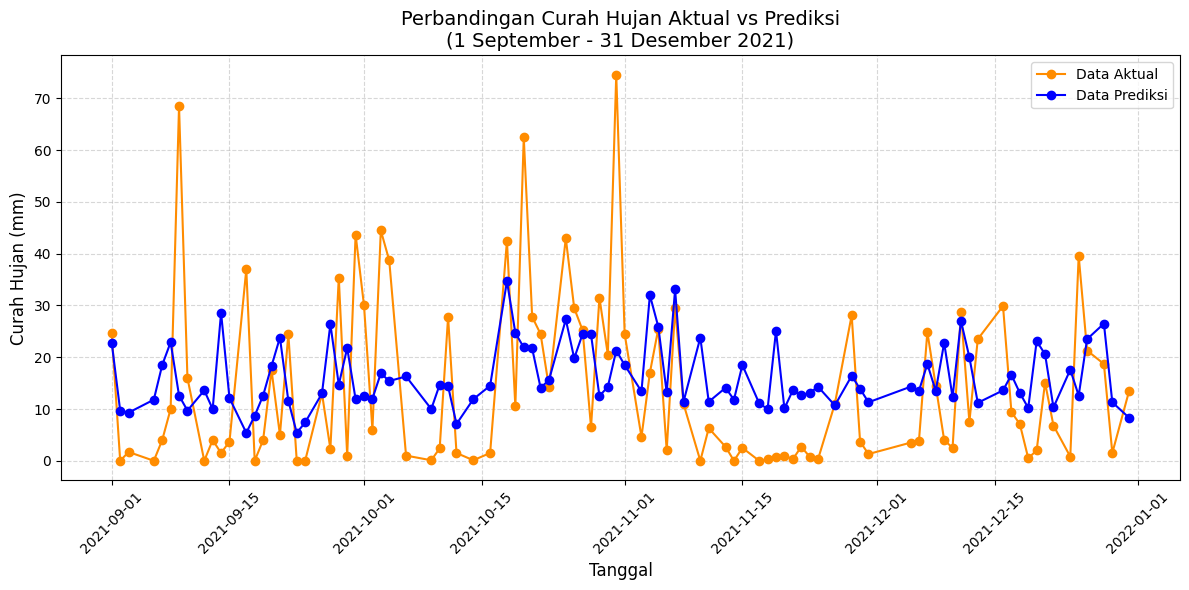

In [ ]:
# Filter berdasarkan rentang tanggal
start_date = '2021-9-1'
end_date = '2021-12-31'
mask = (hasil_prediksi['Tanggal'] >= start_date) & (hasil_prediksi['Tanggal'] <= end_date)
subset_data = hasil_prediksi[mask]

# Visualisasi
plt.figure(figsize=(12, 6))
plt.plot(subset_data['Tanggal'], subset_data['Aktual'], color='darkorange', marker='o', label='Data Aktual')
plt.plot(subset_data['Tanggal'], subset_data['Prediksi'], color='blue', marker='o', label='Data Prediksi')

plt.title('Perbandingan Curah Hujan Aktual vs Prediksi\n(1 September - 31 Desember 2021)', fontsize=14)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Curah Hujan (mm)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

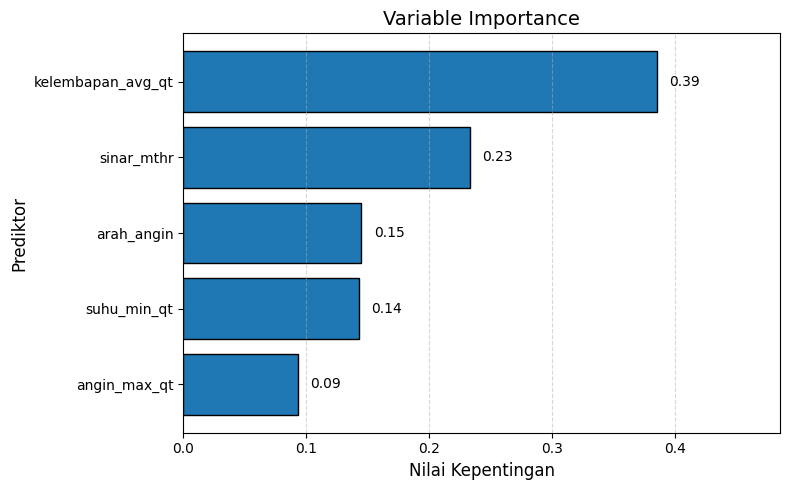

In [ ]:
#variable importance predictors
feature_importances = best_model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': predictors,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=True)

plt.figure(figsize=(8, 5))
bars = plt.barh(importance_df['Feature'], importance_df['Importance'], edgecolor='black')

#menambahkan nilai
for bar, value in zip(bars, importance_df['Importance']):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f'{value:.2f}', va='center', fontsize=10)

plt.xlabel('Nilai Kepentingan', fontsize=12)
plt.ylabel('Prediktor', fontsize=12)
plt.title('Variable Importance', fontsize=14)
plt.xlim(0, max(importance_df['Importance']) + 0.1)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Prediksi 1 tahun kedepan**

In [ ]:
path_pred = '/content/drive/MyDrive/dataskripsi/fitur.csv'
df_pred = pd.read_csv(path_pred)
print(df_pred.head(10))

      Tanggal  suhu_min  kelembapan_avg  sinar_mthr  angin_max  arah_angin
0  01-01-2019      22.5            89.0         1.9       10.0       286.0
1  02-01-2019      23.4            84.0         1.8        5.0       260.0
2  03-01-2019      22.9            76.0         6.8        3.0       240.0
3  04-01-2019      21.3            77.0         5.6        4.0       320.0
4  05-01-2019      22.0            76.0        11.2        7.0       360.0
5  06-01-2019      23.2            78.0         9.3        3.0       340.0
6  07-01-2019      24.0            82.0         8.5        4.0       180.0
7  08-01-2019       NaN            84.0         7.1        2.0       200.0
8  09-01-2019      23.1            86.0         6.8        4.0       360.0
9  10-01-2019      23.0            86.0         5.6        4.0       350.0


In [ ]:
df_pred.isna().sum()

,0
Tanggal,0
suhu_min,193
kelembapan_avg,47
sinar_mthr,57
angin_max,6
arah_angin,7


In [ ]:
#mengisi nilai hilang dengan rata-rata
df_pred= df_pred.fillna(
    df_pred.mean(numeric_only=True).round(1))

df_pred.isna().sum()

,0
Tanggal,0
suhu_min,0
kelembapan_avg,0
sinar_mthr,0
angin_max,0
arah_angin,0


In [ ]:
df_pred.head()

,Tanggal,suhu_min,kelembapan_avg,sinar_mthr,angin_max,arah_angin
0,01-01-2019,22.5,89.0,1.9,10.0,286.0
1,02-01-2019,23.4,84.0,1.8,5.0,260.0
2,03-01-2019,22.9,76.0,6.8,3.0,240.0
3,04-01-2019,21.3,77.0,5.6,4.0,320.0
4,05-01-2019,22.0,76.0,11.2,7.0,360.0


Membuat fitur 2025 berdasarkan data musiman historis 2019-2024

In [ ]:
# memastikan kolom 'Tanggal' bertipe datetime
df_pred['Tanggal'] = pd.to_datetime(df_pred['Tanggal'], format='%d-%m-%Y')

In [ ]:
# menambahkan kolom untuk format hari dan bulan
df_pred['day_month'] = df_pred['Tanggal'].dt.strftime('%d-%m')

In [ ]:
# Fitur yang akan dihitung rata-ratanya
fitur = ['suhu_min', 'kelembapan_avg', 'sinar_mthr', 'angin_max', 'arah_angin']

# menghitung rata-rata musiman (berdasarkan day-month)
seasonal_avg = df_pred.groupby('day_month')[fitur].mean().reset_index()

In [ ]:
# membuat tanggal untuk 2025
tanggal_2025 = pd.date_range(start='2025-01-01', end='2025-12-31', freq='D')
df_2025 = pd.DataFrame({'Tanggal': tanggal_2025})
df_2025['day_month'] = df_2025['Tanggal'].dt.strftime('%d-%m')

In [ ]:
# menggabungkan rata-rata musiman dengan tanggal 2025
df_fitur_2025 = pd.merge(df_2025, seasonal_avg, on='day_month', how='left')

In [ ]:
# menghapus kolom day-month
df_fitur_2025 = df_fitur_2025.drop(columns='day_month')

In [ ]:
#membulatkan hasil 1 dibelakang koma
df_fitur_2025[fitur] = df_fitur_2025[fitur].round(1)

print(df_fitur_2025.head())

     Tanggal  suhu_min  kelembapan_avg  sinar_mthr  angin_max  arah_angin
0 2025-01-01      22.7            86.7         2.2        5.0       227.7
1 2025-01-02      22.4            86.7         2.5        4.0       222.5
2 2025-01-03      22.5            83.8         3.5        3.5       275.0
3 2025-01-04      22.4            83.8         3.5        4.3       270.0
4 2025-01-05      22.4            83.7         4.1        4.2       326.7


In [ ]:
df_fitur_2025.count()

,0
Tanggal,365
suhu_min,365
kelembapan_avg,365
sinar_mthr,365
angin_max,365
arah_angin,365


In [ ]:
#Transformation
# menerapkan transformasi yang sama ke fitur
df_fitur_2025[[f + '_qt' for f in fitur_outlier]] = qt.transform(df_fitur_2025[fitur_outlier])

print(df_fitur_2025[[f for f in fitur_outlier] + [f + '_qt' for f in fitur_outlier]].head())

   suhu_min  kelembapan_avg  angin_max  suhu_min_qt  kelembapan_avg_qt  \
0      22.7            86.7        5.0     0.241963           0.383564   
1      22.4            86.7        4.0    -0.222630           0.383564   
2      22.5            83.8        3.5    -0.016310          -0.286821   
3      22.4            83.8        4.3    -0.222630          -0.286821   
4      22.4            83.7        4.2    -0.222630          -0.287165   

   angin_max_qt  
0      0.292676  
1     -0.261387  
2     -0.635920  
3      0.077359  
4      0.077107  


In [ ]:
predictors = ['suhu_min_qt', 'kelembapan_avg_qt', 'sinar_mthr', 'angin_max_qt', 'arah_angin']

In [ ]:
X_pred = df_fitur_2025[predictors]

In [ ]:
#menerapkan model terbaik grid search untuk memprediksi curah hujan 2025
prediksi_curahhujan = best_model.predict(X_pred)

In [ ]:
hasil_prediksi_2025 = df_fitur_2025.copy()
hasil_prediksi_2025['Prediksi_Curah_Hujan'] = np.round(prediksi_curahhujan, 1)

In [ ]:
#hasil prediksi curah hujan
print(hasil_prediksi_2025[['Tanggal', 'Prediksi_Curah_Hujan']].head(20))

      Tanggal  Prediksi_Curah_Hujan
0  2025-01-01                  16.3
1  2025-01-02                  16.7
2  2025-01-03                  10.2
3  2025-01-04                  10.6
4  2025-01-05                  11.4
5  2025-01-06                  16.8
6  2025-01-07                  12.3
7  2025-01-08                  22.6
8  2025-01-09                  16.8
9  2025-01-10                  17.1
10 2025-01-11                  16.9
11 2025-01-12                  17.5
12 2025-01-13                  14.2
13 2025-01-14                  12.7
14 2025-01-15                  17.7
15 2025-01-16                  11.0
16 2025-01-17                  17.2
17 2025-01-18                  16.8
18 2025-01-19                  15.4
19 2025-01-20                  12.6


In [ ]:
# Filter data untuk bulan Juli 2025
juli_2025 = hasil_prediksi_2025[
    (hasil_prediksi_2025['Tanggal'].dt.month == 7) &
    (hasil_prediksi_2025['Tanggal'].dt.year == 2025)
]

print(juli_2025[['Tanggal', 'Prediksi_Curah_Hujan']].head(30))

       Tanggal  Prediksi_Curah_Hujan
181 2025-07-01                  12.6
182 2025-07-02                  14.6
183 2025-07-03                  14.8
184 2025-07-04                  13.1
185 2025-07-05                  12.6
186 2025-07-06                  27.6
187 2025-07-07                  10.7
188 2025-07-08                  14.5
189 2025-07-09                  14.1
190 2025-07-10                  14.0
191 2025-07-11                  10.1
192 2025-07-12                  10.9
193 2025-07-13                  14.5
194 2025-07-14                  12.7
195 2025-07-15                  13.0
196 2025-07-16                  12.8
197 2025-07-17                  12.2
198 2025-07-18                   6.7
199 2025-07-19                  10.0
200 2025-07-20                  10.8
201 2025-07-21                  13.1
202 2025-07-22                  10.6
203 2025-07-23                  14.2
204 2025-07-24                  14.0
205 2025-07-25                  10.6
206 2025-07-26                   7.2
2

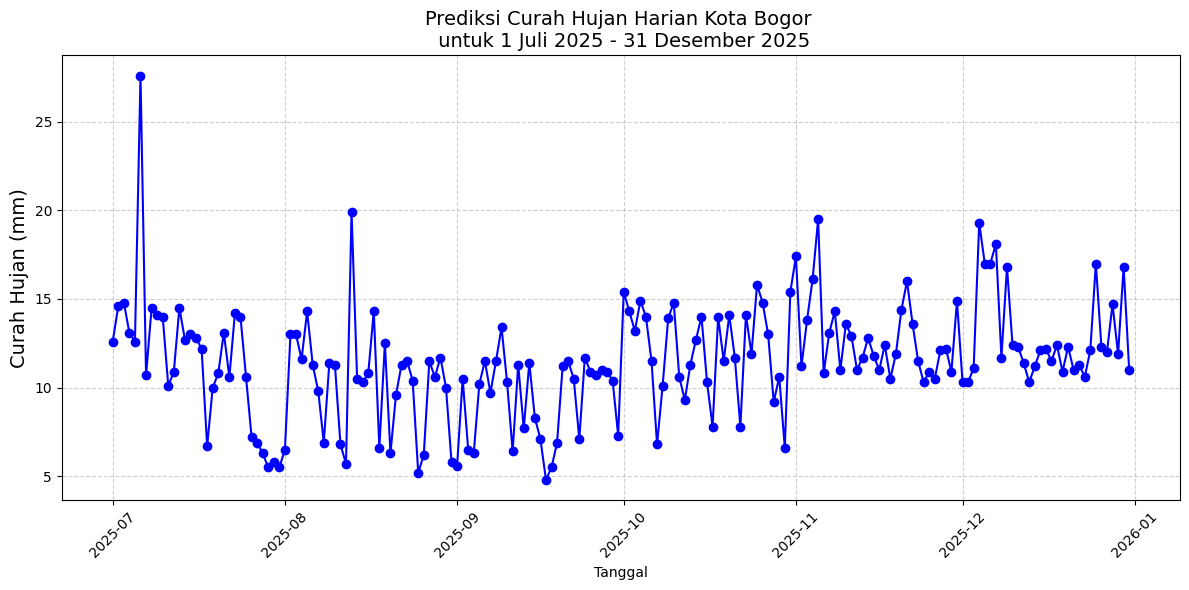

In [ ]:
subset = hasil_prediksi_2025[(hasil_prediksi_2025['Tanggal'] >= '2025-07-01') &
                             (hasil_prediksi_2025['Tanggal'] <= '2025-12-31')]

plt.figure(figsize=(12, 6))
plt.plot(subset['Tanggal'], subset['Prediksi_Curah_Hujan'], marker='o', color='blue')
plt.title('Prediksi Curah Hujan Harian Kota Bogor \n untuk 1 Juli 2025 - 31 Desember 2025', fontsize=14)
plt.xlabel('Tanggal')
plt.ylabel('Curah Hujan (mm)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()